# <center> Fundamentals of Data Science Mini Project </center>


## <center> Analysis of Mall Customers </center>

### <center> Import required packages </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <center> Load data </center>

In [2]:
data_frame = pd.read_csv("Mall_Customers.csv")
data_frame.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Remove the Customer ID column as it is not required

In [4]:
data_frame = data_frame[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]
data_frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Text(0, 0.5, 'Count')

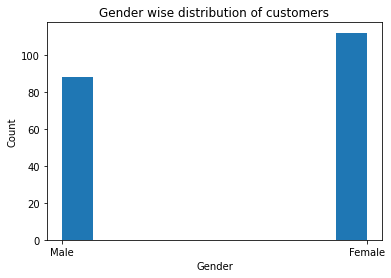

In [5]:
ax = plt.subplot()
ax.hist(data_frame["Gender"])
ax.set_title("Gender wise distribution of customers") 
ax.set_xlabel("Gender")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

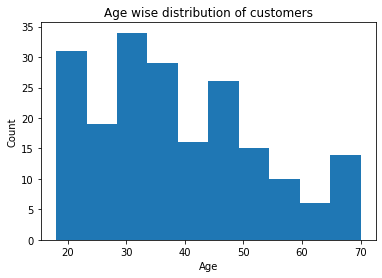

In [6]:
ax = plt.subplot()
ax.hist(data_frame["Age"])
ax.set_title("Age wise distribution of customers") 
ax.set_xlabel("Age")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

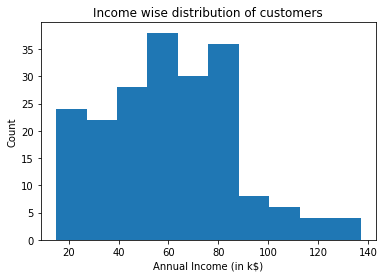

In [7]:
ax = plt.subplot()
ax.hist(data_frame["Annual Income (k$)"])
ax.set_title("Income wise distribution of customers") 
ax.set_xlabel("Annual Income (in k$)")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

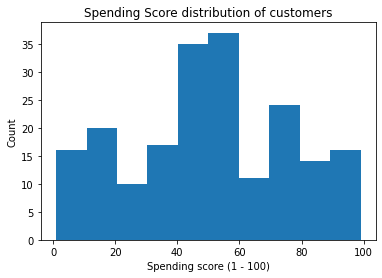

In [8]:
ax = plt.subplot()
ax.hist(data_frame["Spending Score (1-100)"])
ax.set_title("Spending Score distribution of customers") 
ax.set_xlabel("Spending score (1 - 100)")
ax.set_ylabel("Count")

#### Find the probability of a male customer visiting the mall given that the spending score was greater than 50 points


<u>Solution:</u>

In [9]:
# Let,
#  A : The customer is a male.
#  B : The customer has a spending score greater than 50 points.

# Generate a pivot table to obtain required data
data_frame["count"] = 1
data_frame["Score greater than 50"] = np.where(data_frame["Spending Score (1-100)"] > 50, 1, 0)

pivot_table = pd.pivot_table(data_frame, values = "count", index = ["Gender"], columns = ["Score greater than 50"], fill_value = 0, aggfunc = np.size)
print(pivot_table)

Score greater than 50   0   1
Gender                       
Female                 59  53
Male                   44  44


In [10]:
# Using marginal probability, we get
P_A = (44 + 44) / (44 + 44 + 59 + 53)
P_A_n_B = (44) / (44 + 44 + 59 + 53)
P_B = (53 + 44) / (44 + 44 + 59 + 53)

print("Probability of customer being a male is", P_A)
print("Probability of customer having a spending score greater than 50 is", P_B)
print("Probability of customer being a male and having a spending score greater than 50 is", P_A_n_B)

# Required probability is: P(A | B) = P(A n B) / P(B)
P_A_given_B = P_A_n_B / P_B
print("Probability of customer being male given that the spending score is greater than 50 is", P_A_given_B)

Probability of customer being a male is 0.44
Probability of customer having a spending score greater than 50 is 0.485
Probability of customer being a male and having a spending score greater than 50 is 0.22
Probability of customer being male given that the spending score is greater than 50 is 0.4536082474226804


#### Find the probability of a female customer visiting the mall with an annual income greater than 70 k\$ given that the spending score was greater than 50 points


<u>Solution:</u>

In [11]:
# Let,
# A : The customer is a female
# B : The customer has an annual income greater than 70 k$
# C : The spending score is greater than 50 points

# Generate a pivot table to obtain required data
data_frame["count"] = 1
data_frame["Income greater than 70 k$"] = np.where(data_frame["Annual Income (k$)"] > 70, 1, 0)

pivot_table_2 = pd.pivot_table(data_frame, values = "count", index = ["Income greater than 70 k$", "Gender"], columns = ["Score greater than 50"], fill_value = 0, aggfunc = np.size)
print(pivot_table_2)

Score greater than 50              0   1
Income greater than 70 k$ Gender        
0                         Female  42  33
                          Male    24  27
1                         Female  17  20
                          Male    20  17


In [12]:
# Using marginal probability, we gets
P_A = (42 + 33 + 17 + 20) / (42 + 33 + 24 + 27 + 17 + 20 + 20 + 17)
P_B = (17 + 20 + 20 + 17) / (42 + 33 + 24 + 27 + 17 + 20 + 20 + 17)
P_C = (33 + 27 + 20 + 17) / (42 + 33 + 24 + 27 + 17 + 20 + 20 + 17)
P_A_n_B = (17 + 20) / (42 + 33 + 24 + 27 + 17 + 20 + 20 + 17)
P_A_n_B_n_C = 20 / (42 + 33 + 24 + 27 + 17 + 20 + 20 + 17)

print("Probability of a female customer visiting the mall is", P_A)
print("Probability of a customer having an annual income greater than 70 k$ is", P_B)
print("Probability of a customer having a spending score greater than 50 is", P_C)
print("Probability of a female customer having an annual income greater than 70 k$ is", P_A_n_B)
print("Probability of a female customer having an annual income greater than 70 k$ and a spending score greater than 50 is", 
      P_A_n_B_n_C)

# Required probability is P(A n B / C) = P(A n B n C) / P(C)
P_A_n_B_given_C = P_A_n_B_n_C / P_C
print("Probability of a female customer with an annual income greater than 70 k$ given that the spending score is greater than 50 is", P_A_n_B_given_C)

Probability of a female customer visiting the mall is 0.56
Probability of a customer having an annual income greater than 70 k$ is 0.37
Probability of a customer having a spending score greater than 50 is 0.485
Probability of a female customer having an annual income greater than 70 k$ is 0.185
Probability of a female customer having an annual income greater than 70 k$ and a spending score greater than 50 is 0.1
Probability of a female customer with an annual income greater than 70 k$ given that the spending score is greater than 50 is 0.2061855670103093
